In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [6]:
fake_data = pd.read_csv("Fake.csv")
true_data = pd.read_csv("True.csv")


In [7]:
fake_data.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
true_data.head()


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [9]:
true_data.isna().sum()


title      0
text       0
subject    0
date       0
dtype: int64

In [10]:
fake_data.isna().sum()


title      0
text       0
subject    0
date       0
dtype: int64

In [11]:
true_data['Target'] = ['True']*len(true_data)
fake_data['Target'] = ['Fake']*len(fake_data)
data = true_data.append(fake_data).sample(frac=1).reset_index().drop(columns=['index'])
data.shape
data.head()

,title,text,subject,date,Target
0,U.S. spy agencies probe another flank in Russi...,SAN FRANCISCO (Reuters) - Russian hacking of t...,politicsNews,"June 7, 2017",True
1,VIOLENT RIOT Shuts Down Free Speech Of Breitba...,PRICELESS! MILO DESTROYS Heckling Muslim Woman...,politics,"Feb 1, 2017",Fake
2,Chuck Schumer DESTROYS Ted Cruz Over Vow To B...,Senator Chuck Schumer ( D- NY) is furious with...,News,"February 14, 2016",Fake
3,Senate blocks bill that would override state G...,(Reuters) - The U.S. Senate on Wednesday block...,politicsNews,"March 16, 2016",True
4,Cambodia accuses U.S. of political interferenc...,PHNOM PENH (Reuters) - Cambodia hit back on Th...,worldnews,"August 24, 2017",True


In [12]:
data['label'] = pd.get_dummies(data.Target)['Fake']


In [13]:
data.head()


,title,text,subject,date,Target,label
0,U.S. spy agencies probe another flank in Russi...,SAN FRANCISCO (Reuters) - Russian hacking of t...,politicsNews,"June 7, 2017",True,0
1,VIOLENT RIOT Shuts Down Free Speech Of Breitba...,PRICELESS! MILO DESTROYS Heckling Muslim Woman...,politics,"Feb 1, 2017",Fake,1
2,Chuck Schumer DESTROYS Ted Cruz Over Vow To B...,Senator Chuck Schumer ( D- NY) is furious with...,News,"February 14, 2016",Fake,1
3,Senate blocks bill that would override state G...,(Reuters) - The U.S. Senate on Wednesday block...,politicsNews,"March 16, 2016",True,0
4,Cambodia accuses U.S. of political interferenc...,PHNOM PENH (Reuters) - Cambodia hit back on Th...,worldnews,"August 24, 2017",True,0


In [14]:
data.isnull().sum()


title      0
text       0
subject    0
date       0
Target     0
label      0
dtype: int64

Real News Subject :  {'politicsNews': 11272, 'worldnews': 10145}
Fake News Subject :  {'News': 9050, 'politics': 6841, 'left-news': 4459, 'Government News': 1570, 'US_News': 783, 'Middle-east': 778}


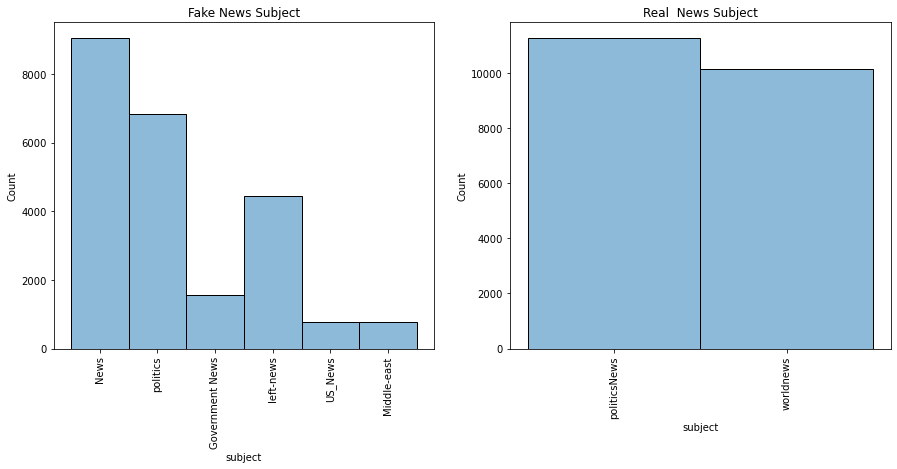

In [15]:
fig, axes = plt.subplots(1,2, figsize = (15,6))

#Adding the histogram1 - True News
sns.histplot(true_data.subject, palette = 'Set1', alpha = 0.5, ax = axes[1])
axes[1].tick_params(axis = 'x', rotation = 90)
axes[1].set_title('Real  News Subject')

#Adding the histogram2 - Fake News
sns.histplot(fake_data.subject, palette = 'Set1', alpha = 0.5, ax = axes[0])
axes[0].tick_params(axis = 'x', rotation = 90)
axes[0].set_title('Fake News Subject')


#Printing the count of Subject
print("Real News Subject : ",dict(true_data.subject.value_counts()))
print("Fake News Subject : ",dict(fake_data.subject.value_counts()))

1    23481
0    21417
Name: label, dtype: int64

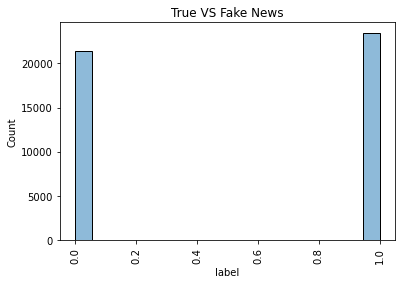

In [16]:
sns.histplot(data.label, palette = 'Set1', alpha = 0.5)
plt.tick_params(axis = 'x', rotation = 90)
plt.title('True VS Fake News')
data.label.value_counts()

In [17]:
from sklearn.model_selection import train_test_split


In [18]:
!pip install "numpy<1.24.0"


In [19]:
train_text, temp_text, train_labels, temp_labels = train_test_split(data['title'], data['label'], 
                                                                    random_state=2018, 
                                                                    test_size=0.3, 
                                                                    stratify=data['Target'])
# Validation-Test split
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=2018, 
                                                                test_size=0.5, 
                                                                stratify=temp_labels)

In [20]:
! pip install transformers
! pip install pycaret


ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.



  Created wheel for pyod: filename=pyod-1.1.0-py3-none-any.whl size=185343 sha256=c5132ccb01fec038ce7e46fa0029fa4d9dad55248b35773773f265f21ee343e4
  Stored in directory: c:\users\91978\appdata\local\pip\cache\wheels\77\4e\a8\442459c5124a54438dd0f2f4a48aa089d26735e3d798a6e0af
Successfully built pyod
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe-1.1.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.3
    Uninstalling pandas-1.1.3:
      Successfully uninstalled pandas-1.1.3
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.50.2
    Uninstalling tqdm-4.50.2:
      Successfully uninstalled tqdm-4.50.2
  Attempting uninstall: joblib
    Found existing installation: joblib 0.17.0
    Uninstalling joblib-0.17.0:

In [25]:
!pip install pycaret


  Using cached pycaret-3.0.4-py3-none-any.whl (484 kB)
  Using cached schemdraw-0.15-py3-none-any.whl (106 kB)
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
  Using cached kaleido-0.2.1-py2.py3-none-win_amd64.whl (65.9 MB)
  Using cached numba-0.57.1-cp38-cp38-win_amd64.whl (2.6 MB)
  Using cached statsmodels-0.14.0-cp38-cp38-win_amd64.whl (9.4 MB)
  Using cached xxhash-3.3.0-cp38-cp38-win_amd64.whl (29 kB)
  Using cached ipywidgets-8.1.0-py3-none-any.whl (139 kB)
Processing c:\users\91978\appdata\local\pip\cache\wheels\77\4e\a8\442459c5124a54438dd0f2f4a48aa089d26735e3d798a6e0af\pyod-1.1.0-py3-none-any.whl
  Using cached psutil-5.9.5-cp36-abi3-win_amd64.whl (255 kB)
  Using cached tbats-1.1.3-py3-none-any.whl (44 kB)
  Using cached category_encoders-2.6.1-py2.py3-none-any.whl (81 kB)
  Using cached pmdarima-2.0.3-cp38-cp38-win_amd64.whl (572 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached llvmlite-0.40.1-cp38-cp38-win_amd64.whl (27.7 MB)


ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.



  Using cached jupyterlab_widgets-3.0.8-py3-none-any.whl (214 kB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0


In [30]:
import transformers
from transformers import AutoModel, BertTokenizerFast

In [31]:
import pycaret

ModuleNotFoundError: No module named 'pycaret'

In [27]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch
import torch.nn as nn

In [32]:
bert = AutoModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

C:\Users\91978\anaconda3\lib\site-packages\huggingface_hub\file_download.py:129: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\91978\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [33]:
sample_data = ["Build fake news model.", "Using bert."] # sample data
tokenized_sample_data = tokenizer.batch_encode_plus(sample_data,padding=True)     # encode text
print(tokenized_sample_data)

{'input_ids': [[101, 3857, 8275, 2739, 2944, 1012, 102], [101, 2478, 14324, 1012, 102, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 0, 0]]}


In [34]:
MAX_LENGHT = 15
# Tokenize and encode sequences in the train set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)
# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)
# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

C:\Users\91978\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [35]:
seq_len = [len(title.split()) for title in train_text]


In [36]:
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

In [37]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
batch_size = 32                                               #define a batch size

train_data = TensorDataset(train_seq, train_mask, train_y)    # wrap tensors
train_sampler = RandomSampler(train_data)                     # sampler for sampling the data during training
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
                                                              # dataLoader for train set
val_data = TensorDataset(val_seq, val_mask, val_y)            # wrap tensors
val_sampler = SequentialSampler(val_data)                     # sampler for sampling the data during training
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [38]:
for param in bert.parameters():
    param.requires_grad = False    # false here means gradient need not be computed

In [39]:
class BERT_Arch(nn.Module):
    def __init__(self, bert):  
      super(BERT_Arch, self).__init__()
      self.bert = bert   
      self.dropout = nn.Dropout(0.1)            # dropout layer
      self.relu =  nn.ReLU()                    # relu activation function
      self.fc1 = nn.Linear(768,512)             # dense layer 1
      self.fc2 = nn.Linear(512,2)               # dense layer 2 (Output layer)
      self.softmax = nn.LogSoftmax(dim=1)       # softmax activation function
    def forward(self, sent_id, mask):           # define the forward pass  
      cls_hs = self.bert(sent_id, attention_mask=mask)['pooler_output']
                                                # pass the inputs to the model
      x = self.fc1(cls_hs)
      x = self.relu(x)
      x = self.dropout(x)
      x = self.fc2(x)                           # output layer
      x = self.softmax(x)                       # apply softmax activation
      return x

model = BERT_Arch(bert)
# Defining the hyperparameters (optimizer, weights of the classes and the epochs)
# Define the optimizer
from transformers import AdamW
optimizer = AdamW(model.parameters(),
                  lr = 1e-05)          # learning rate
# Define the loss function
cross_entropy  = nn.NLLLoss() 
# Number of training epochs
epochs = 2

C:\Users\91978\anaconda3\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [40]:

# Defining training and evaluation functions
def train():  
  model.train()
  total_loss, total_accuracy = 0, 0
  
  for step,batch in enumerate(train_dataloader):                # iterate over batches
    if step % 50 == 0 and not step == 0:                        # progress update after every 50 batches.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
    batch = [r for r in batch]                                  # push the batch to gpu
    sent_id, mask, labels = batch 
    model.zero_grad()                                           # clear previously calculated gradients
    preds = model(sent_id, mask)                                # get model predictions for current batch
    loss = cross_entropy(preds, labels)                         # compute loss between actual & predicted values
    total_loss = total_loss + loss.item()                       # add on to the total loss
    loss.backward()                                             # backward pass to calculate the gradients
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)     # clip gradients to 1.0. It helps in preventing exploding gradient problem
    optimizer.step()                                            # update parameters
    preds=preds.detach().cpu().numpy()                          # model predictions are stored on GPU. So, push it to CPU

  avg_loss = total_loss / len(train_dataloader)                 # compute training loss of the epoch  
                                                                # reshape predictions in form of (# samples, # classes)
  return avg_loss                                 # returns the loss and predictions

def evaluate():  
  print("\nEvaluating...")  
  model.eval()                                    # Deactivate dropout layers
  total_loss, total_accuracy = 0, 0  
  for step,batch in enumerate(val_dataloader):    # Iterate over batches  
    if step % 50 == 0 and not step == 0:          # Progress update every 50 batches.     
                                                  # Calculate elapsed time in minutes.
                                                  # Elapsed = format_time(time.time() - t0)
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))
                                                  # Report progress
    batch = [t for t in batch]                    # Push the batch to GPU
    sent_id, mask, labels = batch
    with torch.no_grad():                         # Deactivate autograd
      preds = model(sent_id, mask)                # Model predictions
      loss = cross_entropy(preds,labels)          # Compute the validation loss between actual and predicted values
      total_loss = total_loss + loss.item()
      preds = preds.detach().cpu().numpy()
  avg_loss = total_loss / len(val_dataloader)         # compute the validation loss of the epoch
  return avg_loss

In [41]:
best_valid_loss = float('inf')
train_losses=[]                   # empty lists to store training and validation loss of each epoch
valid_losses=[]

for epoch in range(epochs):     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))     
    train_loss = train()                       # train model
    valid_loss = evaluate()                    # evaluate model
    if valid_loss < best_valid_loss:              # save the best model
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'c2_new_model_weights.pt')
    train_losses.append(train_loss)               # append training and validation loss
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 2
  Batch    50  of    983.
  Batch   100  of    983.
  Batch   150  of    983.
  Batch   200  of    983.
  Batch   250  of    983.
  Batch   300  of    983.
  Batch   350  of    983.
  Batch   400  of    983.
  Batch   450  of    983.
  Batch   500  of    983.
  Batch   550  of    983.
  Batch   600  of    983.
  Batch   650  of    983.
  Batch   700  of    983.
  Batch   750  of    983.
  Batch   800  of    983.
  Batch   850  of    983.
  Batch   900  of    983.
  Batch   950  of    983.

Evaluating...
  Batch    50  of    211.
  Batch   100  of    211.
  Batch   150  of    211.
  Batch   200  of    211.

Training Loss: 0.564
Validation Loss: 0.493

 Epoch 2 / 2
  Batch    50  of    983.
  Batch   100  of    983.
  Batch   150  of    983.
  Batch   200  of    983.
  Batch   250  of    983.
  Batch   300  of    983.
  Batch   350  of    983.
  Batch   400  of    983.
  Batch   450  of    983.
  Batch   500  of    983.
  Batch   550  of    983.
  Batch   600  of    983.
  

In [42]:
import numpy as np


In [43]:
with torch.no_grad():
  preds = model(test_seq, test_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83      3213
           1       0.91      0.72      0.81      3522

    accuracy                           0.82      6735
   macro avg       0.83      0.82      0.82      6735
weighted avg       0.84      0.82      0.82      6735



In [44]:
unseen_news_text = ["Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing",     # Fake
                    "U.S. lawmakers question businessman at 2016 Trump Tower meeting: sources",           # True
                    "Trump administration issues new rules on U.S. visa waivers"                          # True
                    ]

# tokenize and encode sequences in the test set
MAX_LENGHT = 15
tokens_unseen = tokenizer.batch_encode_plus(
    unseen_news_text,
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

unseen_seq = torch.tensor(tokens_unseen['input_ids'])
unseen_mask = torch.tensor(tokens_unseen['attention_mask'])

with torch.no_grad():
  preds = model(unseen_seq, unseen_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
preds

array([1, 0, 0], dtype=int64)